In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
import sklearn
import pandas as pd
import pickle
import seaborn as sns
from scipy import stats

# TODO : Importation des librairies
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import load_diabetes

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier, Perceptron, RidgeClassifier, SGDRegressor, PassiveAggressiveRegressor, LinearRegression, Lasso, ElasticNet, Ridge, HuberRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

from sklearn.cluster import KMeans, AgglomerativeClustering, Birch, DBSCAN, MiniBatchKMeans, MeanShift, OPTICS, AffinityPropagation
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from lightgbm import LGBMClassifier

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
import sklearn
import pandas as pd
import pickle

#metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import cross_val_predict
import tensorflow as tf


2023-08-11 09:05:13.682195: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Loader le dataset

In [3]:
df = pd.read_csv('/fraud-workspace/Datasets_sauvegardes/dataset-fraude-detection-fusionner-sans-nan-feature-ingeniering-10-08-2023.csv')

In [4]:
pd.set_option('display.max_columns', None)
df.head(5)

,isFraud,TransactionAmt,ProductCD,card1,card3,card4,card5,card6,addr2,P_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,D1,D2,D3,D4,D10,D11,D15,M4,M6,V3,V4,V5,V6,V10,V11,V12,V13,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V66,V67,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V89,V90,V91,V92,V93,V94,V96,V97,V98,V99,V100,V101,V102,V103,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V129,V131,V281,V282,V283,V284,V285,V287,V288,V289,V290,V291,V292,V293,V300,V301,V302,V303,V304,V309,V310,V312,V313,V314,V315,Year,Month,NbTran_by_client,SunMontTran_by_client,MoyTran_by_client,MaxMontTran_by_client,MinMontTran_by_client,DiffTran_by_client
0,0,68.5,4,13926,150,1,142,1,87,16,1,1,0,0,0,1,0,0,1,0,2,0,1,14,0,13,0,13,13,0,2,1,1,1,1,1,0,0,1,1,0,0,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0,0.0,0,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1970,1,1,68.50,68.50,68.50,68.50,0.00
1,0,29.0,4,2755,150,2,102,1,87,16,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0,0.0,0,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1970,1,131,56922.92,434.53,4592.02,25.95,4566.07
2,0,59.0,4,4663,150,3,166,2,87,35,1,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,315,315,0,0,1,1,1,1,0,0,1,1,0,0,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,1,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0,0.0,0,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1970,1,198,19564.40,98.81,664.00,12.50,651.50
3,0,50.0,4,18132,150,2,117,2,87,53,2,5,0,0,0,4,0,0,1,0,1,0,25,112,112,0,94,84,0,111,0,0,1,1,1,1,0,0,1,1,0,0,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,1,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,48,28,0,10,4,1,38,24,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0,135.0,0,0,0,0,10,4,0,0,1,1,1,1,0,0,0,0,0,0.0,354.0,135.0,0.0,0.0,0.0,1970,1,6,490.00,81.67,120.00,50.00,70.00
4,0,50.0,1,4497,150,2,102,1,87,16,1,1,0,0,0,1,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,1,0,0,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,1,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0,0.0,0,1,1,0,0,0,0,0,1,1,1,0,0,0,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1970,1,3,130.00,43.33,50.00,30.00,20.00


In [5]:
df_copie = df.copy()

In [6]:
df_copie.shape

(590540, 174)

In [7]:
# Separer X et y
y = df_copie['isFraud']
X = df_copie.drop(['isFraud'], axis=1)

In [8]:
#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.20, stratify = y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((472432, 173), (118108, 173), (472432,), (118108,))

In [9]:
#over_sampling sur les donnees d'entrainement

from imblearn.over_sampling import SMOTE
sm = SMOTE()

X_train, y_train = sm.fit_resample(X_train, y_train)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((911804, 173), (118108, 173), (911804,), (118108,))

In [10]:
# Normalisation des features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [11]:

# Construction du modèle de Deep Learning en mode entonnoir
inputs = tf.keras.Input(shape=(X_train.shape[1],))
x = tf.keras.layers.Dense(512, activation='relu')(inputs)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)

# Couche entonnoir
branch1 = tf.keras.layers.Dense(32, activation='relu')(x)
branch1 = tf.keras.layers.Dense(16, activation='relu')(branch1)
branch1 = tf.keras.layers.Dropout(0.2)(branch1)

branch2 = tf.keras.layers.Dense(64, activation='relu')(x)
branch2 = tf.keras.layers.Dense(16, activation='relu')(branch2)
branch2 = tf.keras.layers.Dropout(0.2)(branch2)

branch3 = tf.keras.layers.Dense(128, activation='relu')(x)
branch3 = tf.keras.layers.Dense(16, activation='relu')(branch3)
branch3 = tf.keras.layers.Dropout(0.2)(branch3)

branch4 = tf.keras.layers.Dense(256, activation='relu')(x)
branch4 = tf.keras.layers.Dense(16, activation='relu')(branch4)
branch4 = tf.keras.layers.Dropout(0.2)(branch4)

branch5 = tf.keras.layers.Dense(512, activation='relu')(x)
branch5 = tf.keras.layers.Dense(16, activation='relu')(branch5)
branch5 = tf.keras.layers.Dropout(0.2)(branch5)

# Concaténation des branches
concat = tf.keras.layers.concatenate([branch1, branch2, branch3, branch4, branch5 ])

# Couche de sortie
output = tf.keras.layers.Dense(1, activation='sigmoid')(concat)

# Création du modèle
model_DNN = tf.keras.Model(inputs=inputs, outputs=output)

# Compilation du modèle
model_DNN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC'])

# Afficher le sommaire de l'architecture de l'instant du modele genere precedemment
model_DNN.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 173)]                0         []                            
                                                                                                  
 dense (Dense)               (None, 512)                  89088     ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 512)                  0         ['dense[0][0]']               
                                                                                                  
 dense_1 (Dense)             (None, 256)                  131328    ['dropout[0][0]']             
                                                                                              

2023-08-11 09:05:26.884963: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 377 MB memory:  -> device: 0, name: NVIDIA RTX A5000, pci bus id: 0000:c3:00.0, compute capability: 8.6


In [12]:
# Entraînement du modèle
history = model_DNN.fit(X_train, y_train, epochs=10, batch_size=512, validation_data=(X_test, y_test))

In [ ]:
# Sauvegarder notre model
filename = '../Models_sauvegardes/model_DNN_10_08_2023.sav'
pickle.dump(model_DNN, open(filename, 'wb'))

In [ ]:
# Évaluation du modèle sur les données de test
y_pred = model_DNN.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

accuracy = model_DNN.evaluate(X_test, y_test)[1]
auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)

print(f"Accuracy: {accuracy}")
print(f"AUC: {auc}")
print(f"F1-score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

3691/3691 [==============================] - 7s 2ms/step - loss: 0.1393 - auc: 0.9170
Accuracy: 0.9169986248016357
AUC: 0.9190281125806674
F1-score: 0.4750855521241967
Precision: 0.3626401630988787
Recall: 0.6886039196709413


In [ ]:
y_pred_binary

In [ ]:
y_pred

In [ ]:
# Définition d'un seuil de classification (par exemple 60%)
threshold = 0.6

# Labels prédits pour un seuil donné
label_pred_threshold = (y_pred > threshold).astype(int)
# Calcul de la matrice de confusion pour un seuil donné
matrix_threshold = confusion_matrix(
    y_true=y_test, y_pred=label_pred_threshold
)

print(matrix_threshold)

[[110223   3752]
 [  1430   2703]]


In [ ]:
# Extract the true positive, true negative, false positive, and false negative values from the confusion matrix
tp, fp, fn, tn = matrix_threshold.ravel()
 
# Print the true positive, true negative, false positive, and false negative values
print("True Positive (TP): ", tp)
print("True Negative (TN): ", tn)
print("False Positive (FP): ", fp)
print("False Negative (FN): ", fn)

True Positive (TP):  110223
True Negative (TN):  2703
False Positive (FP):  3752
False Negative (FN):  1430


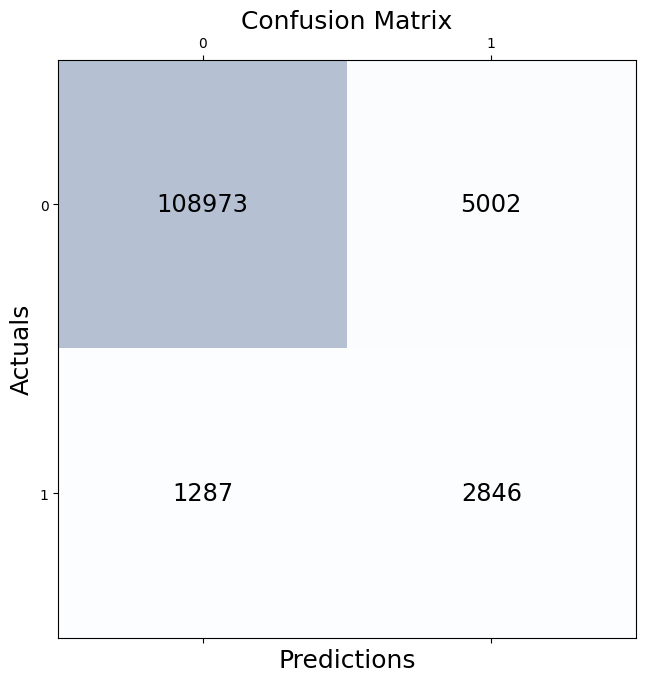

In [ ]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_binary)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
def plot_learning_curves(history):
    # Extraire les métriques d'apprentissage du modèle
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_accuracy = history.history['auc']
    val_accuracy = history.history['val_auc']

    # Tracer les courbes de perte
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    # Tracer les courbes d'exactitude
    plt.subplot(1, 2, 2)
    plt.plot(train_accuracy, label='Training AUC')
    plt.plot(val_accuracy, label='Validation AUC')
    plt.xlabel('Epoch')
    plt.ylabel('AUC')
    plt.title('Training and Validation AUC')
    plt.legend()

    # Afficher le graphique
    plt.tight_layout()
    plt.show()

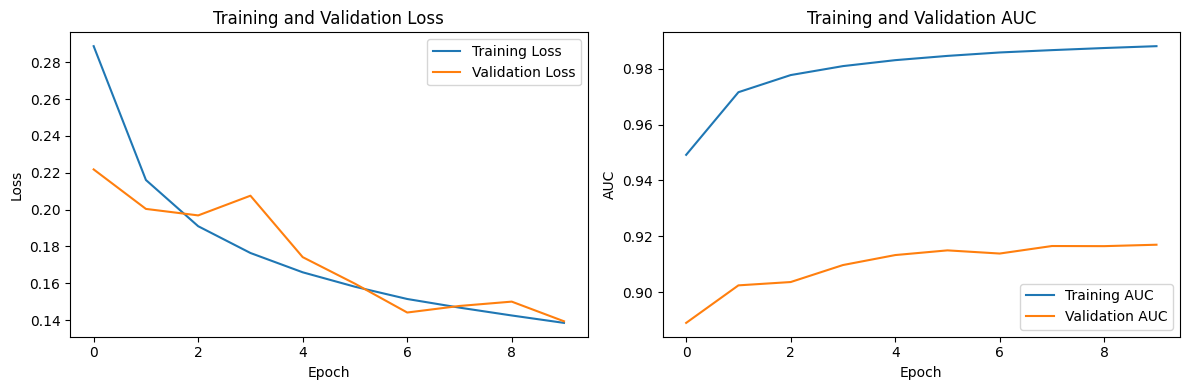

In [ ]:
# Tracer les courbes d'apprentissage et de validation
plot_learning_curves(history)

In [ ]:
# Évaluation du modèle sur les données de test
loss, auc = model_DNN.evaluate(X_test, y_test)
print("Loss:", loss)
print("AUC:", auc)

# Faire des prédictions avec le modèle
predictions = model_DNN.predict(X_test)

3691/3691 [==============================] - 7s 2ms/step - loss: 0.1393 - auc: 0.9170
Loss: 0.13934987783432007
AUC: 0.9169986248016357
3691/3691 [==============================] - 5s 1ms/step


In [ ]:
y_pred_binary

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [ ]:
# Convert the NumPy array to a Pandas Series
y_pred_binary_pd = pd.DataFrame(y_pred_binary)
y_pred_binary_pd

,0
0,0
1,0
2,0
3,0
4,0
...,...
118103,0
118104,0
118105,0
118106,0


In [ ]:
# Renommer les colonnes
y_pred_binary_pd.columns =['Prediction']
y_pred_binary_pd.head(2)

,Prediction
0,0
1,0


In [ ]:
# Renommer les colonnes
y_test_true = y_test
y_test_true.columns =['Valeur reelle']
y_test_true.head(2)


203495    0
227933    0
Name: isFraud, dtype: int64

In [ ]:
# Copier les index dans une nouvelle colonne
index_col = y_test.reset_index().rename(columns={'index': 'index_col'})['index_col']
index_col

0         203495
1         227933
2         262769
3         388075
4          46351
           ...  
118103    124716
118104    338566
118105    390049
118106    380116
118107    175590
Name: index_col, Length: 118108, dtype: int64

In [ ]:
#Modifier l'index des y_pred_binary_pd
y_pred_binary_pd = y_pred_binary_pd.set_index(pd.Index(index_col))
y_pred_binary_pd

,Prediction
index_col,
203495,0
227933,0
262769,0
388075,0
46351,0
...,...
124716,0
338566,0
390049,0


In [ ]:
#Fusionner les y_test et y_pred_binary_pd
merged_df_pred = pd.merge(y_test, y_pred_binary_pd ,how ='left',left_index=True,right_index=True)
merged_df_pred.head(10)

,isFraud,Prediction
203495,0,0
227933,0,0
262769,0,0
388075,0,0
46351,0,0
478711,0,0
572494,0,0
438755,0,0
65404,0,0
411744,0,0
